In [14]:
###################################
# ---   Übungsblatt 4      ---
# --- Programmieraufgabe 4 ---
# Namen der Gruppenmitglieder:
# 1. ...
# 2. ...
# 3. ...
#
# Ersetzen Sie die Lücken (...) mit dem passenden Matlab Code
# Alle Dateien muessen bis zum 23.11.2024 auf ISIS hochgeladen werden
###################################


### Programmieraufgabe 1 
(7 Punkte):
1. Implementieren Sie eine MATLAB oder Python Funktion NevilleAitken, welche das Schema von Neville-Aitken zur Auswertung des Interpolationspolynoms $P$ vom Grad $N$ and der Stelle xEval, welche die Stützstellen ( $\mathrm{x0}, \mathrm{f0}$ ), . . , ( $\mathrm{xN}, \mathrm{fN}$ ) interpoliert. Dabei sollen die Vektoren $x=[x 0, \ldots, x N]$ und $f=[f 0, \ldots, f N]$, sowie die auszuwertende Stelle xEval die Eingabe und die Auswertung $P(\mathrm{xEval})$ der Rückgabewert sein.
2. Plotten Sie mit Hilfe der Funktion NevilleAitken für $N=1,2,3,4$ die Interpolationspolynome $P_N$ vom Grad $N$ im Intervall $[0,1]$, welche die Stützstellen $(i / N, \cos (2 \pi i / N))$ für $i=0, \ldots, N$ interpolieren. Ergänzen Sie die Funktion cos in Ihrer Graphik.

In [15]:
import numpy as np
import matplotlib.pyplot as plt

Python Version: 3.13.0

Matplotlib Version: 3.9.2

NumPy Version: 1.26.4

In [16]:
def neville_aitken(x, f, x_eval):
    """
    Neville-Aitken interpolation scheme

    Parameters:
    x (list or np.ndarray): Vector of first components of interpolation points (xi, fi)
    f (list or np.ndarray): Vector of second components of interpolation points (xi, fi)
    x_eval (float): Evaluation point of interpolation polynomial

    Returns:
    float: Value of the interpolation polynomial at x_eval
    """
    n = len(x)
    P = np.zeros((n, n))
    P[:, 0] = f
    for k in range(1, n):
        for l in range(n - k):
            P[l, k] = ((x_eval - x[l + k]) * P[l, k - 1] + (x[l] - x_eval) * P[l + 1, k - 1]) / (x[l] - x[l + k])

    return P[0, n - 1]

<>:11: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\p'
C:\Users\lars-\AppData\Local\Temp\ipykernel_29860\2863415539.py:11: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(x_vals, np.cos(2 * np.pi * x_vals), label='cos(2$\pi$x)')


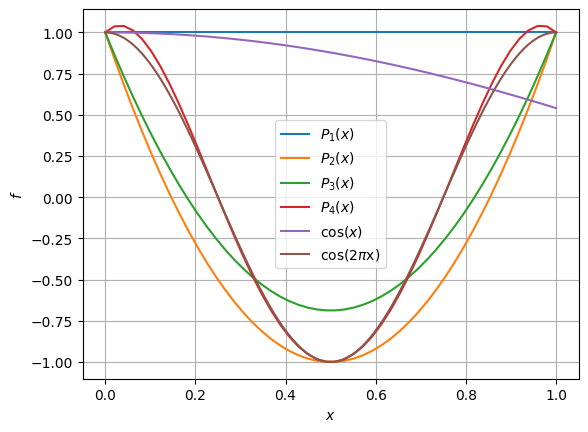

In [17]:
x_eval = np.linspace(0, 1, 50)
for N in range(1, 5):
    x = np.linspace(0, 1, N+1)
    f = np.cos(2*np.pi*x)
    y_eval = []
    for x_val in x_eval:
        y_eval.append(neville_aitken(x, f, x_val))
    plt.plot(x_eval, y_eval, label=f"$P_{N}(x)$")
plt.plot(x_eval, np.cos(x_eval), label=r"$\cos(x)$")
# Den Plot des cos(2 pi x) füge ich ein, da ich denke das es Sinn ergibt. 
plt.plot(x_vals, np.cos(2 * np.pi * x_vals), label='cos(2$\pi$x)')
plt.xlabel("$x$")
plt.ylabel("$f$")
plt.legend()
plt.grid()
plt.show()